<a href="https://colab.research.google.com/github/woodychang0611/VisDrone/blob/master/VisDronePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Open MMLab Detection Toolbox

In [0]:
!pip install torch==1.4.0 torchvision==0.5.0
!pip install pillow==6.1.0
!pip install numpy==1.17.0
!pip install mmcv==0.4.4
import sys
import os
from PIL import Image,ImageDraw,ImageFont
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import glob
import pandas as pd

if ('google.colab' in sys.modules):
  from google.colab import drive
  drive.mount('/content/gdrive')
  gdrive_root = 'gdrive/My Drive/Deep_Learning/'
  dataset_path = os.path.join(gdrive_root,'Dataset/visdrone_dl')
  image_path =  os.path.join(dataset_path,'train2017')
  annotation_path = os.path.join(dataset_path,'train2017_ann/annotations')

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 38.0MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 2.1MB 10.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


     |████████████████████████████████| 20.4MB 1.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4


     |████████████████████████████████| 61kB 9.0MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.4-cp36-cp36m-linux_x86_64.whl size=175820 sha256=f49aec36579b61790ce1ac8458998652dcdb4e29c1443420fb8cff4d4a72c1b6
  Stored in directory: /root/.cache/pip/wheels/b9/da/25/af57f06eac3a1160254f1e8383e01d33ef5010a73f903e2d68
Successfully built mmcv


ImportError: ignored

In [0]:
import os
from os.path import exists, join, basename, splitext
working_folder = os.getcwd()
git_repo_url = 'https://github.com/open-mmlab/mmdetection'


mmdetection_dir = os.path.join(working_folder, "mmdetection")
if not exists(mmdetection_dir):
    ! git clone -q --recurse-submodules  $git_repo_url
    print("Update mmdetection repo")
    !cd {mmdetection_dir} && git checkout c40cafb1e1347645c1289634a40cc26b7b58163c && git pull
    # dependencies
    !pip install -q mmcv terminaltables
    # build
    !cd {mmdetection_dir} && python setup.py install
    !pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}

## Test predict

Turn down the `score_thr` if you think the model is missing any bbox.
Turn up the `score_thr` if you see too much overlapping bboxes with low scores.

In [0]:
import time
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image
plt.rcParams["axes.grid"] = False

import mmcv
from mmcv.runner import load_checkpoint
import mmcv.visualization.image as mmcv_image
# fix for colab


def imshow(img, win_name='', wait_time=0): plt.figure(
    figsize=(50, 50)); plt.imshow(img)


mmcv_image.imshow = imshow
from mmdet.models import build_detector
from mmdet.apis import inference_detector, init_detector, show_result

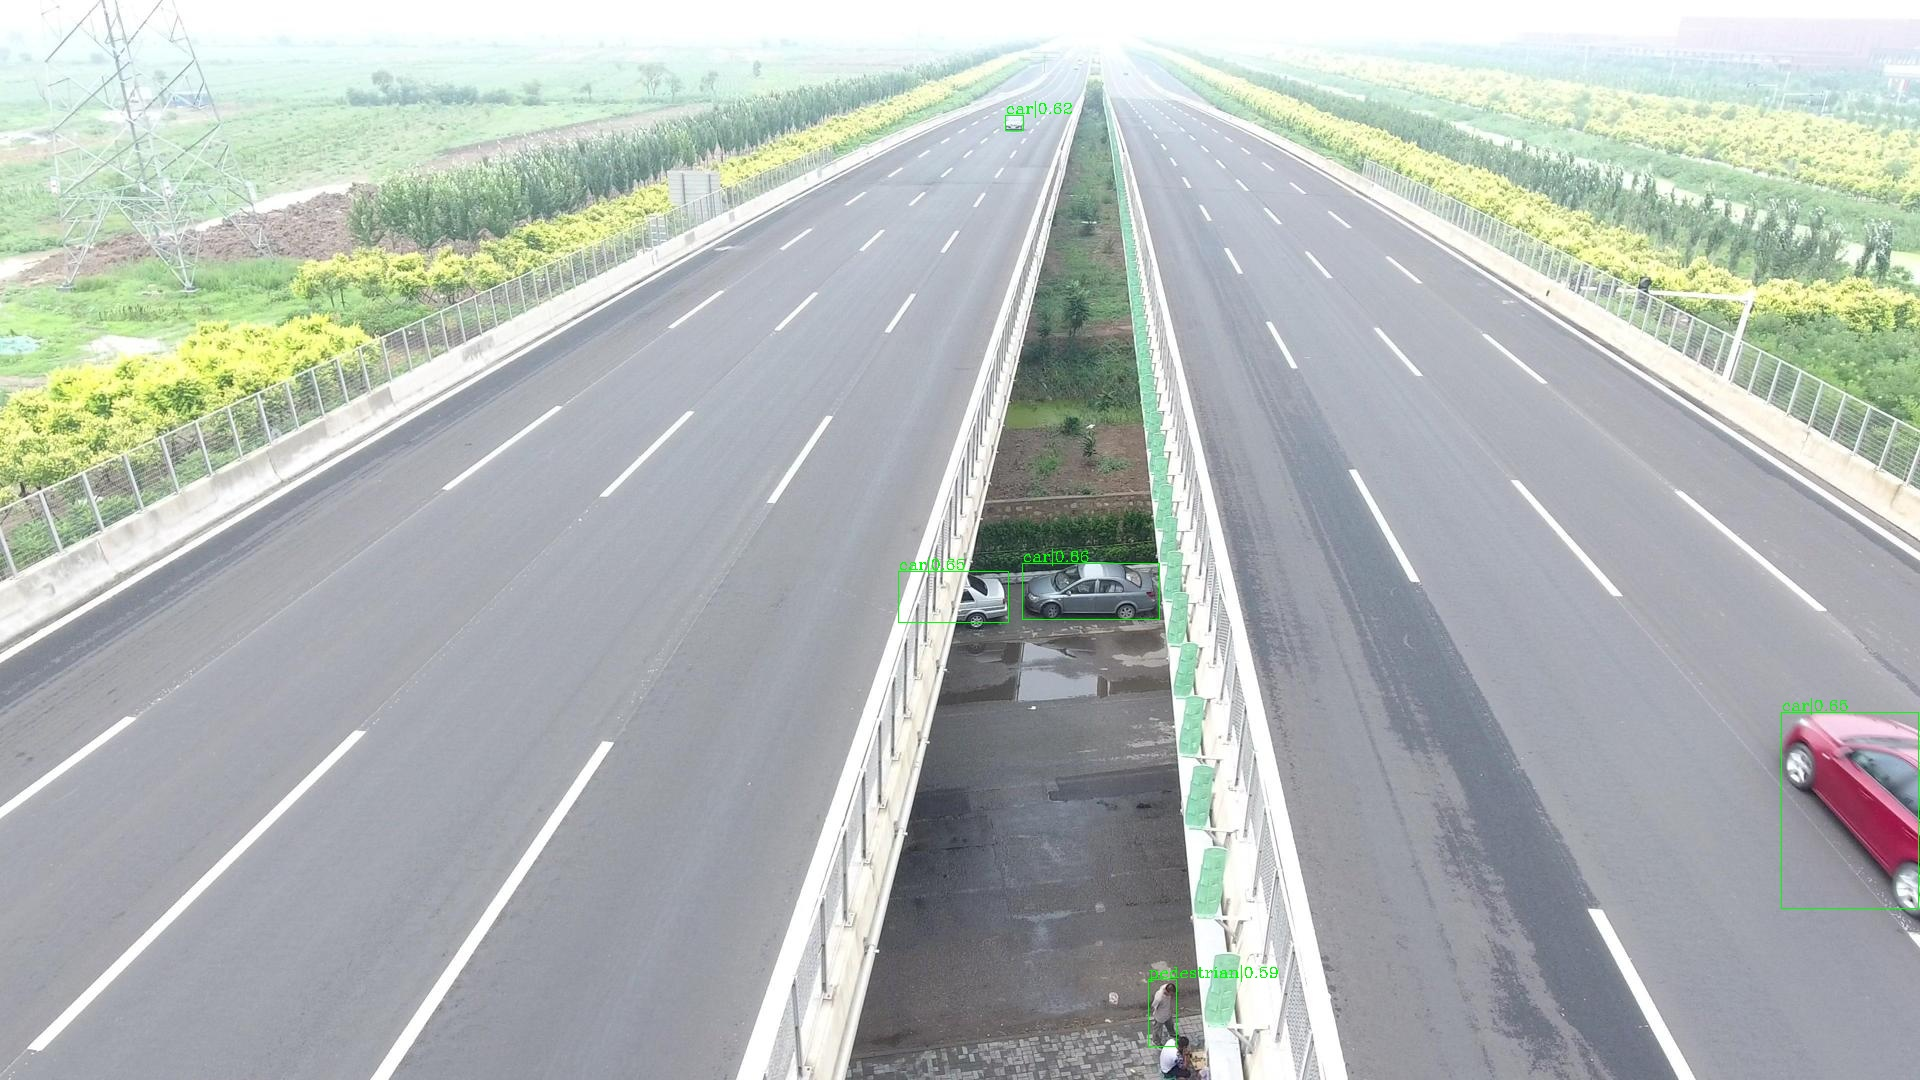

In [0]:
config_file= "/content/gdrive/My Drive/Deep_Learning/VisDrone/config/retinanet_r50_fpn_1x_cleaned.py"
checkpoint_file ="/content/gdrive/My Drive/Deep_Learning/VisDrone/model/cleaned_latest.pth"
score_thr = 0.5

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file)

# test a single image and show the results
img = '/content/gdrive/My Drive/Deep_Learning/Dataset/visdrone_dl/upload_val/val/0000283_00401_d_0000676.jpg'
classes_names = ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']
result = inference_detector(model, img)
show_result(img, result, classes_names,
            score_thr=score_thr, out_file="result.jpg")
Image(filename='result.jpg')


In [0]:
for i in range(0,10):
  for left,top,right,down,s in result[i]:
    if(s>0.5):
      print(f'{left} {top} {right-left} {down-top} {s} {i}')

1148.234619140625 979.1607055664062 28.3197021484375 67.42437744140625 0.5897045731544495 0
1022.0507202148438 563.3106079101562 137.29376220703125 56.2078857421875 0.8613703846931458 3
898.1408081054688 571.6778564453125 110.4381103515625 50.5333251953125 0.6462865471839905 3
1781.90966796875 712.4066162109375 136.64990234375 196.5140380859375 0.6453567147254944 3
1005.0161743164062 115.1232681274414 18.4442138671875 15.430397033691406 0.6175967454910278 3


In [0]:
def predict_image(image,model,score_thr=0.5):
  # test a single image and show the results
  classes_names = ['pedestrian', 'people', 'bicycle', 'car', 'van', 'truck', 'tricycle', 'awning-tricycle', 'bus', 'motor']
  result = inference_detector(model, image)
  show_result(image, result, classes_names,
              score_thr=score_thr, out_file="result.jpg")
  Image(filename='result.jpg')
  reuslt_file=  f"{os.path.dirname(image)}/result/{os.path.basename(image).replace('jpg','txt')}"
  with open(reuslt_file, 'w') as f:
    for i in range(0,10):
      for left,top,right,bottom,confident in result[i]:
          if(confident>0.5):
            message = f'{classes_names[i]} {confident} {left} {top} {right} {bottom}'
            f.write(f"{message}\n")
            #print(message)
final_image_path = '/content/gdrive/My Drive/Deep_Learning/Dataset/visdrone_dl/final'
val_image_path = '/content/gdrive/My Drive/Deep_Learning/Dataset/visdrone_dl/upload_val/val'
images = glob.glob(f"{val_image_path}/*.jpg")
print(len(images))
for image in images[:]:
  predict_image(image,model)
  Image(filename='result.jpg')

274


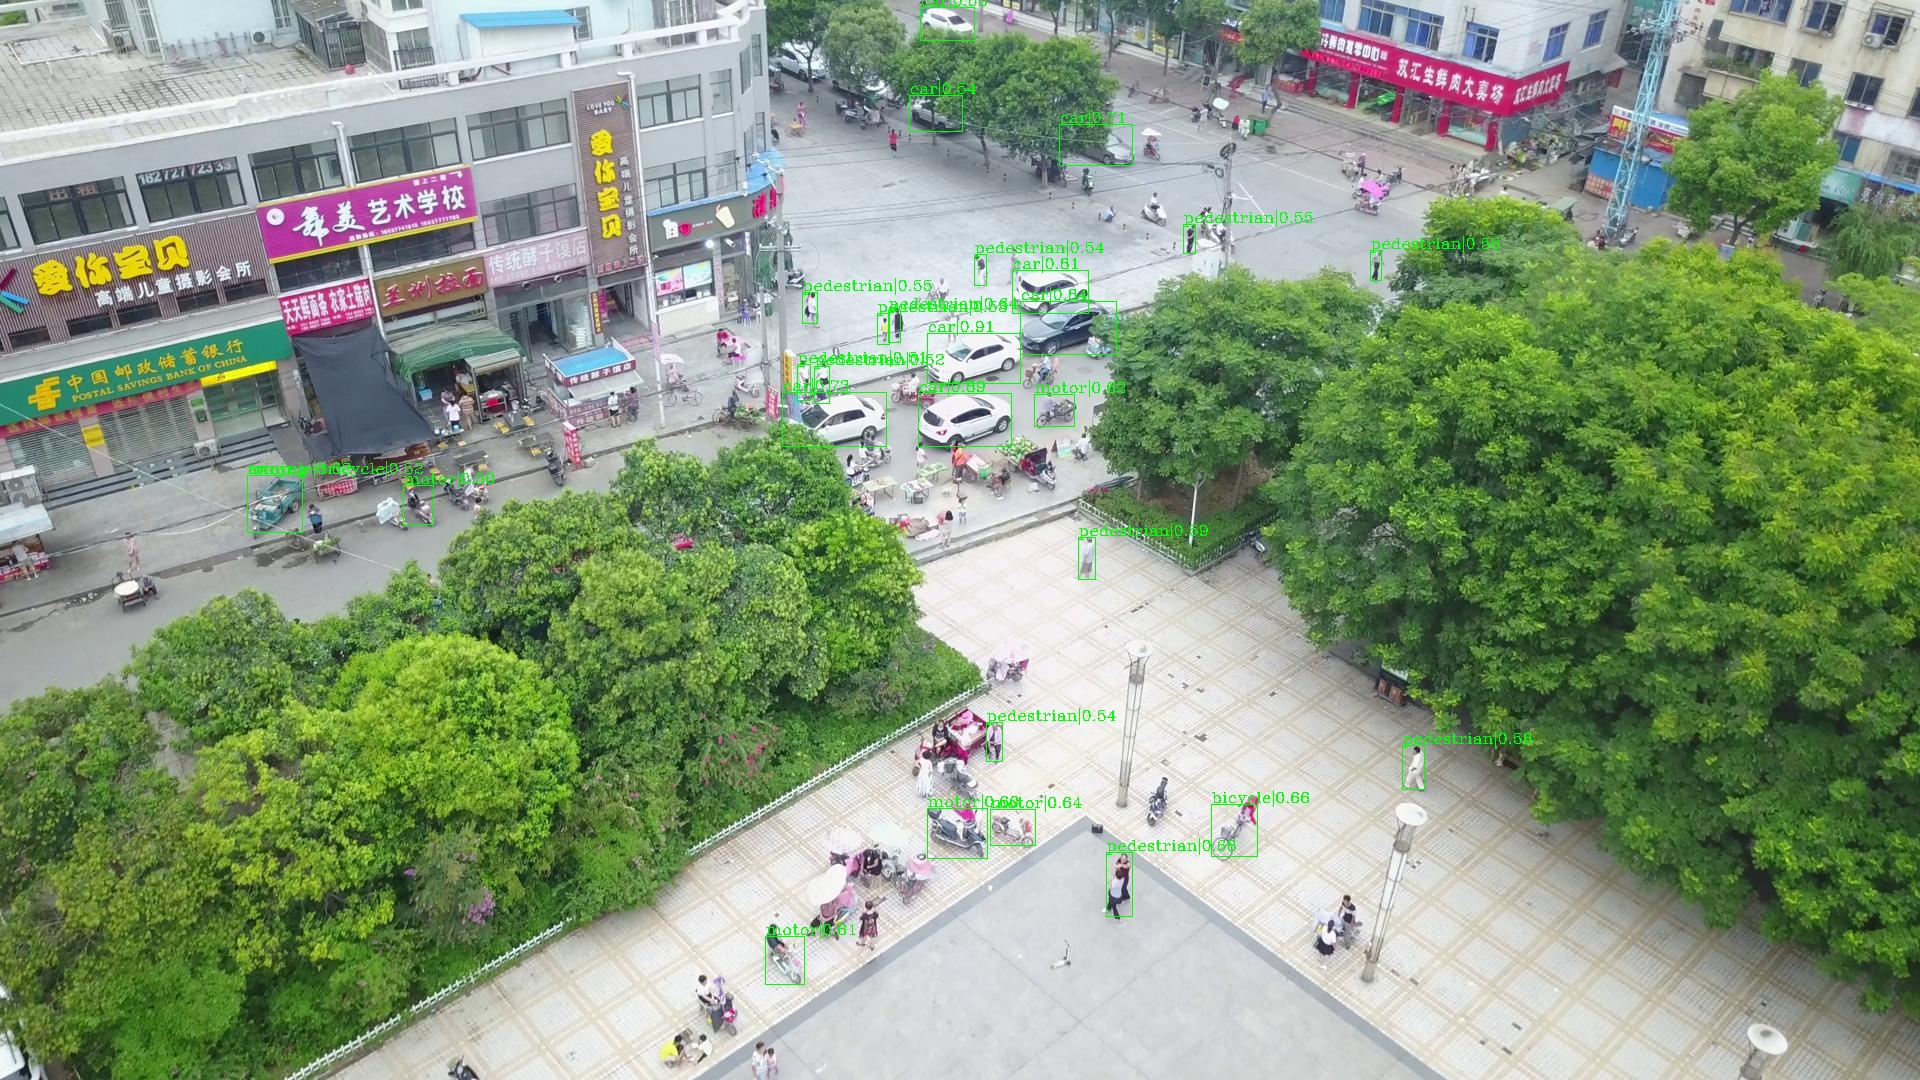

In [0]:
Image(filename='result.jpg')

In [0]:
model._modules

OrderedDict([('backbone', ResNet(
                (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
                (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                (relu): ReLU(inplace=True)
                (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
                (layer1): Sequential(
                  (0): Bottleneck(
                    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                    (bn3): BatchNorm2d(